[View in Colaboratory](https://colab.research.google.com/github/trallen91/Practica/blob/master/PracticaNeuralNet.ipynb)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive/data
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install easydict
# !pip install tensorflow
!pip install tensorboard_logger
!pip install -q keras
import torch
import os
import numpy as np
from scipy.sparse import rand as sprand
from scipy.sparse import lil_matrix
from torch.autograd import Variable
import pandas as pd
CUDA_AVAILABLE = torch.cuda.is_available()
if CUDA_AVAILABLE:
  gpus=[0]
  torch.cuda.set_device(gpus[0])
FloatTensor = torch.cuda.FloatTensor if CUDA_AVAILABLE else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if CUDA_AVAILABLE else torch.LongTensor

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.
ls: cannot access 'drive/data': No such file or directory
  Running setup.py bdist_wheel for easydict ... - done
  Stored in directory: /content/.cache/pip/wheels/58/40/dd/87bc05b3d56641ccb8f099babf6ff5faed5db5c03c5d837450
Successfully built easydict


In [2]:
from google.colab import files
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt

import keras
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

Using TensorFlow backend.


In [28]:
uploaded = files.upload()


#store dataset on google serve as breast_cancer.csv

with open("train_data.csv", 'w') as f:
    f.write(uploaded[(list(uploaded.keys())[0])].decode("utf-8"))
    
train_data = pd.read_csv("train_data.csv")

train_data.drop(['Unnamed: 0', 'Student', 'Year'],axis=1,inplace=True)

train_data.head()

Saving train_data.csv to train_data (5).csv


,Result,PersonSatisf_Mean,PersonSatisf_Variance,RecSatisf_Mean,RecSatisf_Variance,PPI_Init_Mean,PPI_Init_Variance,PPI_Infor_Mean,PPI_Infor_Variance,PPI_Close_Mean,PPI_Close_Variance,PE_Hand_Mean,PE_Hand_Variance,PE_Mod_Mean,PE_Mod_Variance,PE_Check_Mean,PE_Check_Variance,Hx_Mean,Hx_Variance
0,1,0.8125,0.022656,0.775000,0.030625,0.858222,0.016306,0.808571,0.026784,0.790000,0.029122,1.000000,0.000000,1.000,0.0000,0.833234,0.012818,0.797473,0.024034
1,1,0.7500,0.065789,0.750000,0.069444,0.791047,0.081398,0.714571,0.110785,0.783667,0.089963,0.750000,0.214286,1.000,0.0000,0.573770,0.248634,0.773109,0.176898
2,1,0.8125,0.019531,0.750000,0.025000,0.869778,0.020176,0.802857,0.018686,0.843333,0.021344,1.000000,0.000000,0.750,0.1875,0.596181,0.054051,0.735568,0.077585
3,1,0.6000,0.044444,0.616667,0.043519,0.950000,0.048718,0.929577,0.066398,0.709677,0.212903,0.333333,0.250000,1.000,0.0000,0.420455,0.246473,0.672727,0.222185
4,1,0.8125,0.058388,0.750000,0.055556,0.845581,0.054074,0.824286,0.057216,0.878500,0.037345,1.000000,0.000000,0.875,0.1250,0.704918,0.211475,0.847458,0.130378


In [29]:
uploaded = files.upload()


#store dataset on google serve as breast_cancer.csv

with open("test_data.csv", 'w') as f:
    f.write(uploaded[(list(uploaded.keys())[0])].decode("utf-8"))
    
test_data = pd.read_csv("test_data.csv")

test_data.drop(['Unnamed: 0', 'Student', 'Year'],axis=1,inplace=True)

test_data.head()

Saving test_data.csv to test_data (3).csv


,Result,PersonSatisf_Mean,PersonSatisf_Variance,RecSatisf_Mean,RecSatisf_Variance,PPI_Init_Mean,PPI_Init_Variance,PPI_Infor_Mean,PPI_Infor_Variance,PPI_Close_Mean,PPI_Close_Variance,PE_Hand_Mean,PE_Hand_Variance,PE_Mod_Mean,PE_Mod_Variance,PE_Check_Mean,PE_Check_Variance,Hx_Mean,Hx_Variance
0,1,0.7250,0.036875,0.825000,0.025625,0.955000,0.003025,0.920000,0.011233,0.870952,0.010456,0.875000,0.015625,0.687500,0.183594,0.583110,0.044525,0.769417,0.061063
1,1,0.7250,0.103472,0.744444,0.100617,0.950000,0.048718,0.887324,0.101408,0.806452,0.161290,0.666667,0.250000,0.888889,0.111111,0.659091,0.227273,0.845455,0.131860
2,1,0.4750,0.103472,0.469444,0.075694,0.900000,0.092308,0.859155,0.122736,0.870968,0.116129,0.111111,0.111111,0.888889,0.111111,0.568182,0.248171,0.872727,0.112093
3,1,0.6625,0.113651,0.600000,0.155556,0.650814,0.118078,0.618571,0.130412,0.644333,0.135618,1.000000,0.000000,0.875000,0.125000,0.491803,0.254098,0.788136,0.168405
4,0,0.5625,0.170230,0.550000,0.191667,0.608372,0.126607,0.527857,0.127866,0.554500,0.135046,1.000000,0.000000,1.000000,0.000000,0.655738,0.229508,0.697479,0.212790


In [30]:
y_train = train_data['Result']

train_data.drop('Result',axis=1,inplace=True)

X_train = train_data

X_train.head()

,PersonSatisf_Mean,PersonSatisf_Variance,RecSatisf_Mean,RecSatisf_Variance,PPI_Init_Mean,PPI_Init_Variance,PPI_Infor_Mean,PPI_Infor_Variance,PPI_Close_Mean,PPI_Close_Variance,PE_Hand_Mean,PE_Hand_Variance,PE_Mod_Mean,PE_Mod_Variance,PE_Check_Mean,PE_Check_Variance,Hx_Mean,Hx_Variance
0,0.8125,0.022656,0.775000,0.030625,0.858222,0.016306,0.808571,0.026784,0.790000,0.029122,1.000000,0.000000,1.000,0.0000,0.833234,0.012818,0.797473,0.024034
1,0.7500,0.065789,0.750000,0.069444,0.791047,0.081398,0.714571,0.110785,0.783667,0.089963,0.750000,0.214286,1.000,0.0000,0.573770,0.248634,0.773109,0.176898
2,0.8125,0.019531,0.750000,0.025000,0.869778,0.020176,0.802857,0.018686,0.843333,0.021344,1.000000,0.000000,0.750,0.1875,0.596181,0.054051,0.735568,0.077585
3,0.6000,0.044444,0.616667,0.043519,0.950000,0.048718,0.929577,0.066398,0.709677,0.212903,0.333333,0.250000,1.000,0.0000,0.420455,0.246473,0.672727,0.222185
4,0.8125,0.058388,0.750000,0.055556,0.845581,0.054074,0.824286,0.057216,0.878500,0.037345,1.000000,0.000000,0.875,0.1250,0.704918,0.211475,0.847458,0.130378


In [31]:
y_test = test_data['Result']

test_data.drop('Result',axis=1,inplace=True)

X_test = test_data

X_test.head()

,PersonSatisf_Mean,PersonSatisf_Variance,RecSatisf_Mean,RecSatisf_Variance,PPI_Init_Mean,PPI_Init_Variance,PPI_Infor_Mean,PPI_Infor_Variance,PPI_Close_Mean,PPI_Close_Variance,PE_Hand_Mean,PE_Hand_Variance,PE_Mod_Mean,PE_Mod_Variance,PE_Check_Mean,PE_Check_Variance,Hx_Mean,Hx_Variance
0,0.7250,0.036875,0.825000,0.025625,0.955000,0.003025,0.920000,0.011233,0.870952,0.010456,0.875000,0.015625,0.687500,0.183594,0.583110,0.044525,0.769417,0.061063
1,0.7250,0.103472,0.744444,0.100617,0.950000,0.048718,0.887324,0.101408,0.806452,0.161290,0.666667,0.250000,0.888889,0.111111,0.659091,0.227273,0.845455,0.131860
2,0.4750,0.103472,0.469444,0.075694,0.900000,0.092308,0.859155,0.122736,0.870968,0.116129,0.111111,0.111111,0.888889,0.111111,0.568182,0.248171,0.872727,0.112093
3,0.6625,0.113651,0.600000,0.155556,0.650814,0.118078,0.618571,0.130412,0.644333,0.135618,1.000000,0.000000,0.875000,0.125000,0.491803,0.254098,0.788136,0.168405
4,0.5625,0.170230,0.550000,0.191667,0.608372,0.126607,0.527857,0.127866,0.554500,0.135046,1.000000,0.000000,1.000000,0.000000,0.655738,0.229508,0.697479,0.212790


In [0]:
nn_classifier = Sequential()

nn_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))

nn_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

nn_classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

nn_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
nn_classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000)

Epoch 1/1000
540/540 [==============================] - 0s 504us/step - loss: 0.6760 - acc: 0.9833
Epoch 2/1000
540/540 [==============================] - 0s 149us/step - loss: 0.5966 - acc: 0.9833
Epoch 3/1000
540/540 [==============================] - 0s 159us/step - loss: 0.4036 - acc: 0.9833
Epoch 4/1000
540/540 [==============================] - 0s 151us/step - loss: 0.2005 - acc: 0.9833
Epoch 5/1000
540/540 [==============================] - 0s 157us/step - loss: 0.1127 - acc: 0.9833
Epoch 6/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0899 - acc: 0.9833
Epoch 7/1000
540/540 [==============================] - 0s 144us/step - loss: 0.0842 - acc: 0.9833
Epoch 8/1000
540/540 [==============================] - 0s 175us/step - loss: 0.0824 - acc: 0.9833
Epoch 9/1000
540/540 [==============================] - 0s 176us/step - loss: 0.0820 - acc: 0.9833
Epoch 10/1000
540/540 [==============================] - 0s 182us/step - loss: 0.0819 - acc: 0.9833
Epoch 11/

Epoch 26/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0818 - acc: 0.9833
Epoch 27/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0816 - acc: 0.9833
Epoch 28/1000
540/540 [==============================] - 0s 150us/step - loss: 0.0817 - acc: 0.9833
Epoch 29/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0814 - acc: 0.9833
Epoch 30/1000
540/540 [==============================] - 0s 180us/step - loss: 0.0815 - acc: 0.9833
Epoch 31/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0820 - acc: 0.9833
Epoch 32/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0813 - acc: 0.9833
Epoch 33/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0821 - acc: 0.9833
Epoch 34/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0814 - acc: 0.9833
Epoch 35/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0818 - acc: 0.9833


Epoch 51/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0824 - acc: 0.9833
Epoch 52/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0814 - acc: 0.9833
Epoch 53/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0812 - acc: 0.9833
Epoch 54/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0811 - acc: 0.9833
Epoch 55/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0811 - acc: 0.9833
Epoch 56/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0812 - acc: 0.9833
Epoch 57/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0812 - acc: 0.9833
Epoch 58/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0813 - acc: 0.9833
Epoch 59/1000
540/540 [==============================] - 0s 147us/step - loss: 0.0813 - acc: 0.9833
Epoch 60/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0811 - acc: 0.9833


540/540 [==============================] - 0s 158us/step - loss: 0.0808 - acc: 0.9833
Epoch 77/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0814 - acc: 0.9833
Epoch 78/1000
540/540 [==============================] - 0s 173us/step - loss: 0.0807 - acc: 0.9833
Epoch 79/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0807 - acc: 0.9833
Epoch 80/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0814 - acc: 0.9833
Epoch 81/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0815 - acc: 0.9833
Epoch 82/1000
540/540 [==============================] - 0s 173us/step - loss: 0.0811 - acc: 0.9833
Epoch 83/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0809 - acc: 0.9833
Epoch 84/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0814 - acc: 0.9833
Epoch 85/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0808 - acc: 0.9833
Epoch 86/1000


540/540 [==============================] - 0s 151us/step - loss: 0.0805 - acc: 0.9833
Epoch 102/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0804 - acc: 0.9833
Epoch 103/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0804 - acc: 0.9833
Epoch 104/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0805 - acc: 0.9833
Epoch 105/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0809 - acc: 0.9833
Epoch 106/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0805 - acc: 0.9833
Epoch 107/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0805 - acc: 0.9833
Epoch 108/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0804 - acc: 0.9833
Epoch 109/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0804 - acc: 0.9833
Epoch 110/1000
540/540 [==============================] - 0s 142us/step - loss: 0.0804 - acc: 0.9833
Epoch

Epoch 126/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0804 - acc: 0.9833
Epoch 127/1000
540/540 [==============================] - 0s 153us/step - loss: 0.0805 - acc: 0.9833
Epoch 128/1000
540/540 [==============================] - 0s 150us/step - loss: 0.0803 - acc: 0.9833
Epoch 129/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0801 - acc: 0.9833
Epoch 130/1000
540/540 [==============================] - 0s 144us/step - loss: 0.0802 - acc: 0.9833
Epoch 131/1000
540/540 [==============================] - 0s 150us/step - loss: 0.0800 - acc: 0.9833
Epoch 132/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0804 - acc: 0.9833
Epoch 133/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0802 - acc: 0.9833
Epoch 134/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0801 - acc: 0.9833
Epoch 135/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0803 - ac

Epoch 151/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0800 - acc: 0.9833
Epoch 152/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0799 - acc: 0.9833
Epoch 153/1000
540/540 [==============================] - 0s 172us/step - loss: 0.0803 - acc: 0.9833
Epoch 154/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0800 - acc: 0.9833
Epoch 155/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0800 - acc: 0.9833
Epoch 156/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0798 - acc: 0.9833
Epoch 157/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0802 - acc: 0.9833
Epoch 158/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0804 - acc: 0.9833
Epoch 159/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0802 - acc: 0.9833
Epoch 160/1000
540/540 [==============================] - 0s 175us/step - loss: 0.0797 - ac

Epoch 176/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0799 - acc: 0.9833
Epoch 177/1000
540/540 [==============================] - 0s 173us/step - loss: 0.0796 - acc: 0.9833
Epoch 178/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0796 - acc: 0.9833
Epoch 179/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0798 - acc: 0.9833
Epoch 180/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0796 - acc: 0.9833
Epoch 181/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0797 - acc: 0.9833
Epoch 182/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0795 - acc: 0.9833
Epoch 183/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0796 - acc: 0.9833
Epoch 184/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0797 - acc: 0.9833
Epoch 185/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0797 - ac

Epoch 201/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0793 - acc: 0.9833
Epoch 202/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0793 - acc: 0.9833
Epoch 203/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0793 - acc: 0.9833
Epoch 204/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0796 - acc: 0.9833
Epoch 205/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0794 - acc: 0.9833
Epoch 206/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0793 - acc: 0.9833
Epoch 207/1000
540/540 [==============================] - 0s 149us/step - loss: 0.0792 - acc: 0.9833
Epoch 208/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0793 - acc: 0.9833
Epoch 209/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0795 - acc: 0.9833
Epoch 210/1000
540/540 [==============================] - 0s 149us/step - loss: 0.0797 - ac

Epoch 226/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0793 - acc: 0.9833
Epoch 227/1000
540/540 [==============================] - 0s 173us/step - loss: 0.0801 - acc: 0.9833
Epoch 228/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0792 - acc: 0.9833
Epoch 229/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0790 - acc: 0.9833
Epoch 230/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0791 - acc: 0.9833
Epoch 231/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0790 - acc: 0.9833
Epoch 232/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0790 - acc: 0.9833
Epoch 233/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0800 - acc: 0.9833
Epoch 234/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0793 - acc: 0.9833
Epoch 235/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0790 - ac

540/540 [==============================] - 0s 167us/step - loss: 0.0794 - acc: 0.9833
Epoch 251/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0790 - acc: 0.9833
Epoch 252/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0790 - acc: 0.9833
Epoch 253/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0788 - acc: 0.9833
Epoch 254/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0787 - acc: 0.9833
Epoch 255/1000
540/540 [==============================] - 0s 181us/step - loss: 0.0787 - acc: 0.9833
Epoch 256/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0787 - acc: 0.9833
Epoch 257/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0789 - acc: 0.9833
Epoch 258/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0787 - acc: 0.9833
Epoch 259/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0789 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 147us/step - loss: 0.0786 - acc: 0.9833
Epoch 276/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0785 - acc: 0.9833
Epoch 277/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0785 - acc: 0.9833
Epoch 278/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0784 - acc: 0.9833
Epoch 279/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0787 - acc: 0.9833
Epoch 280/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0785 - acc: 0.9833
Epoch 281/1000
540/540 [==============================] - 0s 175us/step - loss: 0.0786 - acc: 0.9833
Epoch 282/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0786 - acc: 0.9833
Epoch 283/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0787 - acc: 0.9833
Epoch 284/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0786 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 153us/step - loss: 0.0785 - acc: 0.9833
Epoch 301/1000
540/540 [==============================] - 0s 144us/step - loss: 0.0785 - acc: 0.9833
Epoch 302/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0785 - acc: 0.9833
Epoch 303/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0788 - acc: 0.9833
Epoch 304/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0785 - acc: 0.9833
Epoch 305/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0782 - acc: 0.9833
Epoch 306/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0783 - acc: 0.9833
Epoch 307/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0784 - acc: 0.9833
Epoch 308/1000
540/540 [==============================] - 0s 151us/step - loss: 0.0782 - acc: 0.9833
Epoch 309/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0787 - acc: 0.9833
Epoch

Epoch 325/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0781 - acc: 0.9833
Epoch 326/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0783 - acc: 0.9833
Epoch 327/1000
540/540 [==============================] - 0s 151us/step - loss: 0.0779 - acc: 0.9833
Epoch 328/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0779 - acc: 0.9833
Epoch 329/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0781 - acc: 0.9833
Epoch 330/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0780 - acc: 0.9833
Epoch 331/1000
540/540 [==============================] - 0s 146us/step - loss: 0.0779 - acc: 0.9833
Epoch 332/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0780 - acc: 0.9833
Epoch 333/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0784 - acc: 0.9833
Epoch 334/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0779 - ac

Epoch 350/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0778 - acc: 0.9833
Epoch 351/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0781 - acc: 0.9833
Epoch 352/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0781 - acc: 0.9833
Epoch 353/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0780 - acc: 0.9833
Epoch 354/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0777 - acc: 0.9833
Epoch 355/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0784 - acc: 0.9833
Epoch 356/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0779 - acc: 0.9833
Epoch 357/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0779 - acc: 0.9833
Epoch 358/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0779 - acc: 0.9833
Epoch 359/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0780 - ac

Epoch 375/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0777 - acc: 0.9833
Epoch 376/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0779 - acc: 0.9833
Epoch 377/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0780 - acc: 0.9833
Epoch 378/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0774 - acc: 0.9833
Epoch 379/1000
540/540 [==============================] - 0s 172us/step - loss: 0.0777 - acc: 0.9833
Epoch 380/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0777 - acc: 0.9833
Epoch 381/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0776 - acc: 0.9833
Epoch 382/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0777 - acc: 0.9833
Epoch 383/1000
540/540 [==============================] - 0s 139us/step - loss: 0.0776 - acc: 0.9833
Epoch 384/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0774 - ac

540/540 [==============================] - 0s 151us/step - loss: 0.0774 - acc: 0.9833
Epoch 400/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0775 - acc: 0.9833
Epoch 401/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0778 - acc: 0.9833
Epoch 402/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0779 - acc: 0.9833
Epoch 403/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0774 - acc: 0.9833
Epoch 404/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0773 - acc: 0.9833
Epoch 405/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0771 - acc: 0.9833
Epoch 406/1000
540/540 [==============================] - 0s 147us/step - loss: 0.0772 - acc: 0.9833
Epoch 407/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0774 - acc: 0.9833
Epoch 408/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0772 - acc: 0.9833
Epoch

Epoch 424/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0770 - acc: 0.9833
Epoch 425/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0774 - acc: 0.9833
Epoch 426/1000
540/540 [==============================] - 0s 178us/step - loss: 0.0771 - acc: 0.9833
Epoch 427/1000
540/540 [==============================] - 0s 148us/step - loss: 0.0772 - acc: 0.9833
Epoch 428/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0772 - acc: 0.9833
Epoch 429/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0769 - acc: 0.9833
Epoch 430/1000
540/540 [==============================] - 0s 143us/step - loss: 0.0771 - acc: 0.9833
Epoch 431/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0773 - acc: 0.9833
Epoch 432/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0771 - acc: 0.9833
Epoch 433/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0771 - ac

540/540 [==============================] - 0s 158us/step - loss: 0.0768 - acc: 0.9833
Epoch 449/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0768 - acc: 0.9833
Epoch 450/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0769 - acc: 0.9833
Epoch 451/1000
540/540 [==============================] - 0s 150us/step - loss: 0.0770 - acc: 0.9833
Epoch 452/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0768 - acc: 0.9833
Epoch 453/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0769 - acc: 0.9833
Epoch 454/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0770 - acc: 0.9833
Epoch 455/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0767 - acc: 0.9833
Epoch 456/1000
540/540 [==============================] - 0s 153us/step - loss: 0.0773 - acc: 0.9833
Epoch 457/1000
540/540 [==============================] - 0s 145us/step - loss: 0.0768 - acc: 0.9833
Epoch

Epoch 473/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0769 - acc: 0.9833
Epoch 474/1000
540/540 [==============================] - 0s 148us/step - loss: 0.0767 - acc: 0.9833
Epoch 475/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0766 - acc: 0.9833
Epoch 476/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0774 - acc: 0.9833
Epoch 477/1000
540/540 [==============================] - 0s 151us/step - loss: 0.0773 - acc: 0.9833
Epoch 478/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0766 - acc: 0.9833
Epoch 479/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0766 - acc: 0.9833
Epoch 480/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0770 - acc: 0.9833
Epoch 481/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0766 - acc: 0.9833
Epoch 482/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0768 - ac

Epoch 498/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0765 - acc: 0.9833
Epoch 499/1000
540/540 [==============================] - 0s 174us/step - loss: 0.0767 - acc: 0.9833
Epoch 500/1000
540/540 [==============================] - 0s 151us/step - loss: 0.0767 - acc: 0.9833
Epoch 501/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0765 - acc: 0.9833
Epoch 502/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0765 - acc: 0.9833
Epoch 503/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0764 - acc: 0.9833
Epoch 504/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0767 - acc: 0.9833
Epoch 505/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0765 - acc: 0.9833
Epoch 506/1000
540/540 [==============================] - 0s 180us/step - loss: 0.0766 - acc: 0.9833
Epoch 507/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0770 - ac

540/540 [==============================] - 0s 156us/step - loss: 0.0763 - acc: 0.9833
Epoch 523/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0767 - acc: 0.9833
Epoch 524/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0764 - acc: 0.9833
Epoch 525/1000
540/540 [==============================] - 0s 151us/step - loss: 0.0766 - acc: 0.9833
Epoch 526/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0764 - acc: 0.9833
Epoch 527/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0765 - acc: 0.9833
Epoch 528/1000
540/540 [==============================] - 0s 150us/step - loss: 0.0764 - acc: 0.9833
Epoch 529/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0766 - acc: 0.9833
Epoch 530/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0767 - acc: 0.9833
Epoch 531/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0766 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 171us/step - loss: 0.0764 - acc: 0.9833
Epoch 547/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0763 - acc: 0.9833
Epoch 548/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0765 - acc: 0.9833
Epoch 549/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0760 - acc: 0.9833
Epoch 550/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0765 - acc: 0.9833
Epoch 551/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0765 - acc: 0.9833
Epoch 552/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0765 - acc: 0.9833
Epoch 553/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0763 - acc: 0.9833
Epoch 554/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0763 - acc: 0.9833
Epoch 555/1000
540/540 [==============================] - 0s 153us/step - loss: 0.0765 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 151us/step - loss: 0.0761 - acc: 0.9833
Epoch 572/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0765 - acc: 0.9833
Epoch 573/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0760 - acc: 0.9833
Epoch 574/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0759 - acc: 0.9833
Epoch 575/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0760 - acc: 0.9833
Epoch 576/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0761 - acc: 0.9833
Epoch 577/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0760 - acc: 0.9833
Epoch 578/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0762 - acc: 0.9833
Epoch 579/1000
540/540 [==============================] - 0s 172us/step - loss: 0.0761 - acc: 0.9833
Epoch 580/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0762 - acc: 0.9833
Epoch

Epoch 596/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0758 - acc: 0.9833
Epoch 597/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0760 - acc: 0.9833
Epoch 598/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0762 - acc: 0.9833
Epoch 599/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0758 - acc: 0.9833
Epoch 600/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0761 - acc: 0.9833
Epoch 601/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0762 - acc: 0.9833
Epoch 602/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0760 - acc: 0.9833
Epoch 603/1000
540/540 [==============================] - 0s 177us/step - loss: 0.0759 - acc: 0.9833
Epoch 604/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0759 - acc: 0.9833
Epoch 605/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0761 - ac

540/540 [==============================] - 0s 157us/step - loss: 0.0758 - acc: 0.9833
Epoch 621/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0760 - acc: 0.9833
Epoch 622/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0760 - acc: 0.9833
Epoch 623/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0759 - acc: 0.9833
Epoch 624/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0759 - acc: 0.9833
Epoch 625/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0757 - acc: 0.9833
Epoch 626/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0757 - acc: 0.9833
Epoch 627/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0760 - acc: 0.9833
Epoch 628/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0758 - acc: 0.9833
Epoch 629/1000
540/540 [==============================] - 0s 183us/step - loss: 0.0759 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 178us/step - loss: 0.0762 - acc: 0.9833
Epoch 646/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0762 - acc: 0.9833
Epoch 647/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0759 - acc: 0.9833
Epoch 648/1000
540/540 [==============================] - 0s 184us/step - loss: 0.0759 - acc: 0.9833
Epoch 649/1000
540/540 [==============================] - 0s 172us/step - loss: 0.0756 - acc: 0.9833
Epoch 650/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0755 - acc: 0.9833
Epoch 651/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0756 - acc: 0.9833
Epoch 652/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0758 - acc: 0.9833
Epoch 653/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0761 - acc: 0.9833
Epoch 654/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0758 - acc: 0.9833
Epoch

Epoch 670/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0757 - acc: 0.9833
Epoch 671/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0755 - acc: 0.9833
Epoch 672/1000
540/540 [==============================] - 0s 173us/step - loss: 0.0757 - acc: 0.9833
Epoch 673/1000
540/540 [==============================] - 0s 151us/step - loss: 0.0760 - acc: 0.9833
Epoch 674/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0758 - acc: 0.9833
Epoch 675/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0757 - acc: 0.9833
Epoch 676/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0755 - acc: 0.9833
Epoch 677/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0756 - acc: 0.9833
Epoch 678/1000
540/540 [==============================] - 0s 177us/step - loss: 0.0756 - acc: 0.9833
Epoch 679/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0756 - ac

Epoch 695/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0754 - acc: 0.9833
Epoch 696/1000
540/540 [==============================] - 0s 172us/step - loss: 0.0756 - acc: 0.9833
Epoch 697/1000
540/540 [==============================] - 0s 150us/step - loss: 0.0759 - acc: 0.9833
Epoch 698/1000
540/540 [==============================] - 0s 173us/step - loss: 0.0758 - acc: 0.9833
Epoch 699/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0755 - acc: 0.9833
Epoch 700/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0758 - acc: 0.9833
Epoch 701/1000
540/540 [==============================] - 0s 172us/step - loss: 0.0752 - acc: 0.9833
Epoch 702/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0755 - acc: 0.9833
Epoch 703/1000
540/540 [==============================] - 0s 181us/step - loss: 0.0755 - acc: 0.9833
Epoch 704/1000
540/540 [==============================] - 0s 155us/step - loss: 0.0757 - ac

Epoch 720/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0756 - acc: 0.9833
Epoch 721/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0753 - acc: 0.9833
Epoch 722/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0753 - acc: 0.9833
Epoch 723/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0755 - acc: 0.9833
Epoch 724/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0755 - acc: 0.9833
Epoch 725/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0760 - acc: 0.9833
Epoch 726/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0761 - acc: 0.9833
Epoch 727/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0756 - acc: 0.9833
Epoch 728/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0755 - acc: 0.9833
Epoch 729/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0754 - ac

Epoch 745/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0757 - acc: 0.9833
Epoch 746/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0751 - acc: 0.9833
Epoch 747/1000
540/540 [==============================] - 0s 189us/step - loss: 0.0756 - acc: 0.9833
Epoch 748/1000
540/540 [==============================] - 0s 178us/step - loss: 0.0753 - acc: 0.9833
Epoch 749/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0759 - acc: 0.9833
Epoch 750/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0757 - acc: 0.9833
Epoch 751/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0753 - acc: 0.9833
Epoch 752/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0755 - acc: 0.9833
Epoch 753/1000
540/540 [==============================] - 0s 148us/step - loss: 0.0753 - acc: 0.9833
Epoch 754/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0755 - ac

540/540 [==============================] - 0s 171us/step - loss: 0.0753 - acc: 0.9833
Epoch 770/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0753 - acc: 0.9833
Epoch 771/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0754 - acc: 0.9833
Epoch 772/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0755 - acc: 0.9833
Epoch 773/1000
540/540 [==============================] - 0s 149us/step - loss: 0.0753 - acc: 0.9833
Epoch 774/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0753 - acc: 0.9833
Epoch 775/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0756 - acc: 0.9833
Epoch 776/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0754 - acc: 0.9833
Epoch 777/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0753 - acc: 0.9833
Epoch 778/1000
540/540 [==============================] - 0s 177us/step - loss: 0.0754 - acc: 0.9833
Epoch

Epoch 794/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0754 - acc: 0.9833
Epoch 795/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0751 - acc: 0.9833
Epoch 796/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0751 - acc: 0.9833
Epoch 797/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0753 - acc: 0.9833
Epoch 798/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0752 - acc: 0.9833
Epoch 799/1000
540/540 [==============================] - 0s 146us/step - loss: 0.0754 - acc: 0.9833
Epoch 800/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0756 - acc: 0.9833
Epoch 801/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0752 - acc: 0.9833
Epoch 802/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0753 - acc: 0.9833
Epoch 803/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0751 - ac

Epoch 819/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0750 - acc: 0.9833
Epoch 820/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0750 - acc: 0.9833
Epoch 821/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0751 - acc: 0.9833
Epoch 822/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0753 - acc: 0.9833
Epoch 823/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0752 - acc: 0.9833
Epoch 824/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0754 - acc: 0.9833
Epoch 825/1000
540/540 [==============================] - 0s 147us/step - loss: 0.0754 - acc: 0.9833
Epoch 826/1000
540/540 [==============================] - 0s 168us/step - loss: 0.0752 - acc: 0.9833
Epoch 827/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0753 - acc: 0.9833
Epoch 828/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0753 - ac

540/540 [==============================] - 0s 172us/step - loss: 0.0750 - acc: 0.9833
Epoch 844/1000
540/540 [==============================] - 0s 148us/step - loss: 0.0756 - acc: 0.9833
Epoch 845/1000
540/540 [==============================] - 0s 174us/step - loss: 0.0753 - acc: 0.9833
Epoch 846/1000
540/540 [==============================] - 0s 149us/step - loss: 0.0755 - acc: 0.9833
Epoch 847/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0754 - acc: 0.9833
Epoch 848/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0751 - acc: 0.9833
Epoch 849/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0755 - acc: 0.9833
Epoch 850/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0751 - acc: 0.9833
Epoch 851/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0756 - acc: 0.9833
Epoch 852/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0750 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 170us/step - loss: 0.0750 - acc: 0.9833
Epoch 869/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0751 - acc: 0.9833
Epoch 870/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0752 - acc: 0.9833
Epoch 871/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0751 - acc: 0.9833
Epoch 872/1000
540/540 [==============================] - 0s 153us/step - loss: 0.0749 - acc: 0.9833
Epoch 873/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0755 - acc: 0.9833
Epoch 874/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0753 - acc: 0.9833
Epoch 875/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0753 - acc: 0.9833
Epoch 876/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0754 - acc: 0.9833
Epoch 877/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0756 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 156us/step - loss: 0.0755 - acc: 0.9833
Epoch 894/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0755 - acc: 0.9833
Epoch 895/1000
540/540 [==============================] - 0s 178us/step - loss: 0.0754 - acc: 0.9833
Epoch 896/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0752 - acc: 0.9833
Epoch 897/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0757 - acc: 0.9833
Epoch 898/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0749 - acc: 0.9833
Epoch 899/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0754 - acc: 0.9833
Epoch 900/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0758 - acc: 0.9833
Epoch 901/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0755 - acc: 0.9833
Epoch 902/1000
540/540 [==============================] - 0s 174us/step - loss: 0.0751 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 156us/step - loss: 0.0749 - acc: 0.9833
Epoch 919/1000
540/540 [==============================] - 0s 158us/step - loss: 0.0750 - acc: 0.9833
Epoch 920/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0756 - acc: 0.9833
Epoch 921/1000
540/540 [==============================] - 0s 161us/step - loss: 0.0748 - acc: 0.9833
Epoch 922/1000
540/540 [==============================] - 0s 156us/step - loss: 0.0751 - acc: 0.9833
Epoch 923/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0750 - acc: 0.9833
Epoch 924/1000
540/540 [==============================] - 0s 176us/step - loss: 0.0754 - acc: 0.9833
Epoch 925/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0750 - acc: 0.9833
Epoch 926/1000
540/540 [==============================] - 0s 157us/step - loss: 0.0749 - acc: 0.9833
Epoch 927/1000
540/540 [==============================] - 0s 177us/step - loss: 0.0750 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 156us/step - loss: 0.0750 - acc: 0.9833
Epoch 944/1000
540/540 [==============================] - 0s 149us/step - loss: 0.0748 - acc: 0.9833
Epoch 945/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0748 - acc: 0.9833
Epoch 946/1000
540/540 [==============================] - 0s 178us/step - loss: 0.0750 - acc: 0.9833
Epoch 947/1000
540/540 [==============================] - 0s 154us/step - loss: 0.0753 - acc: 0.9833
Epoch 948/1000
540/540 [==============================] - 0s 166us/step - loss: 0.0751 - acc: 0.9833
Epoch 949/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0753 - acc: 0.9833
Epoch 950/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0751 - acc: 0.9833
Epoch 951/1000
540/540 [==============================] - 0s 152us/step - loss: 0.0749 - acc: 0.9833
Epoch 952/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0748 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 160us/step - loss: 0.0749 - acc: 0.9833
Epoch 969/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0748 - acc: 0.9833
Epoch 970/1000
540/540 [==============================] - 0s 164us/step - loss: 0.0752 - acc: 0.9833
Epoch 971/1000
540/540 [==============================] - 0s 171us/step - loss: 0.0752 - acc: 0.9833
Epoch 972/1000
540/540 [==============================] - 0s 165us/step - loss: 0.0755 - acc: 0.9833
Epoch 973/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0750 - acc: 0.9833
Epoch 974/1000
540/540 [==============================] - 0s 170us/step - loss: 0.0752 - acc: 0.9833
Epoch 975/1000
540/540 [==============================] - 0s 169us/step - loss: 0.0747 - acc: 0.9833
Epoch 976/1000
540/540 [==============================] - 0s 160us/step - loss: 0.0749 - acc: 0.9833
Epoch 977/1000
540/540 [==============================] - 0s 159us/step - loss: 0.0749 - acc: 0.9833
Epoch

540/540 [==============================] - 0s 163us/step - loss: 0.0749 - acc: 0.9833
Epoch 994/1000
540/540 [==============================] - 0s 149us/step - loss: 0.0755 - acc: 0.9833
Epoch 995/1000
540/540 [==============================] - 0s 173us/step - loss: 0.0752 - acc: 0.9833
Epoch 996/1000
540/540 [==============================] - 0s 163us/step - loss: 0.0751 - acc: 0.9833
Epoch 997/1000
540/540 [==============================] - 0s 153us/step - loss: 0.0748 - acc: 0.9833
Epoch 998/1000
540/540 [==============================] - 0s 175us/step - loss: 0.0750 - acc: 0.9833
Epoch 999/1000
540/540 [==============================] - 0s 167us/step - loss: 0.0748 - acc: 0.9833
Epoch 1000/1000
540/540 [==============================] - 0s 162us/step - loss: 0.0747 - acc: 0.9833


In [34]:
y_pred = nn_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

cm

array([[  0,   5],
       [  0, 131]])

Confusion matrix
[[  0   5]
 [  0 131]]


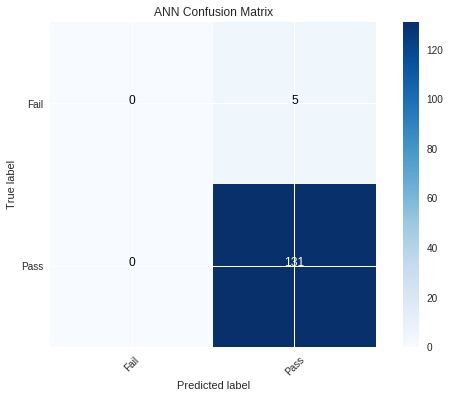

In [35]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot non-normalized confusion matrix
class_names = ['Fail', 'Pass']

plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='ANN Confusion Matrix')


plt.show()

In [27]:
131/136

0.9632352941176471